<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Pandas_Time_Series_Analysis_5_Period_and_PeriodIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Section

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/pandas/18_ts_period/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
pandas_ts_period.ipynb	wmt.csv


In [3]:
# reading walmarts financial data in the file
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/18_ts_period/wmt.csv')
df.head(3)

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


YEARLY PERIOD

In [7]:
# creating a period for year with frequency on annual basis
y = pd.Period('2016',freq='A')
y

Period('2016', 'A-DEC')

In [8]:
# Get the start time of the year
y.start_time

Timestamp('2016-01-01 00:00:00')

In [9]:
# get the end time of the year
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [10]:
y.is_leap_year

True

Monthly

In [11]:
m = pd.Period('2016-8')
m

Period('2016-08', 'M')

In [12]:
m.start_time

Timestamp('2016-08-01 00:00:00')

In [13]:
m.end_time

Timestamp('2016-08-31 23:59:59.999999999')

In [14]:
# addition of months
m+1

Period('2016-09', 'M')

Days

In [15]:
d = pd.Period('2016-02-28')
d

Period('2016-02-28', 'D')

In [16]:
d+1

Period('2016-02-29', 'D')

In [17]:
# non leap year
d = pd.Period('2017-02-28')
d+1

Period('2017-03-01', 'D')

In [19]:
d.start_time

Timestamp('2017-02-28 00:00:00')

In [18]:
d.end_time

Timestamp('2017-02-28 23:59:59.999999999')

Hourly Period

In [20]:
h = pd.Period('2016-02-04 23:45:00', freq='H')
h

Period('2016-02-04 23:00', 'H')

In [21]:
h+1

Period('2016-02-05 00:00', 'H')

In [22]:
h.start_time

Timestamp('2016-02-04 23:00:00')

In [23]:
h.end_time

Timestamp('2016-02-04 23:59:59.999999999')

Quarterly Period

In [24]:
q = pd.Period('2016Q1')
q

Period('2016Q1', 'Q-DEC')

In [46]:
q = pd.Period('2016Q1', freq='Q-MAR') # for year ending march
q

Period('2016Q1', 'Q-MAR')

In [25]:
q+2

Period('2016Q3', 'Q-DEC')

In [47]:
q.start_time

Timestamp('2015-04-01 00:00:00')

In [48]:
q.end_time

Timestamp('2015-06-30 23:59:59.999999999')

 Use as frequency to convert to different period 

In [30]:
q = pd.Period('2016Q1')
q
print(q.asfreq('M',how='start'))
print(q.asfreq('M',how='end'))

2016-01
2016-03


Weekly Frequency

In [44]:
w = pd.Period('2016-01-03' , freq = 'W-WED') # For week ending on Wednesday
w

Period('2015-12-31/2016-01-06', 'W-WED')

In [42]:
w.start_time

Timestamp('2015-12-31 00:00:00')

In [43]:
w.end_time

Timestamp('2016-01-06 23:59:59.999999999')

PeriodIndex and period_range

In [49]:
r = pd.period_range('2011', '2017', freq='q')
r

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]')

In [50]:
r[0].start_time

Timestamp('2011-01-01 00:00:00')

In [51]:
r[0].end_time

Timestamp('2011-03-31 23:59:59.999999999')

In [55]:
import numpy as np
ps = pd.Series(np.random.randint(1,100,len(r)), r)
ps

2011Q1    70
2011Q2    16
2011Q3    77
2011Q4    18
2012Q1    85
2012Q2    32
2012Q3    81
2012Q4     4
2013Q1    92
2013Q2    13
2013Q3    78
2013Q4    71
2014Q1     2
2014Q2    52
2014Q3    83
2014Q4    72
2015Q1    79
2015Q2    80
2015Q3    26
2015Q4    40
2016Q1    88
2016Q2    33
2016Q3    84
2016Q4    99
2017Q1    39
Freq: Q-DEC, dtype: int64

# Walmarts Data

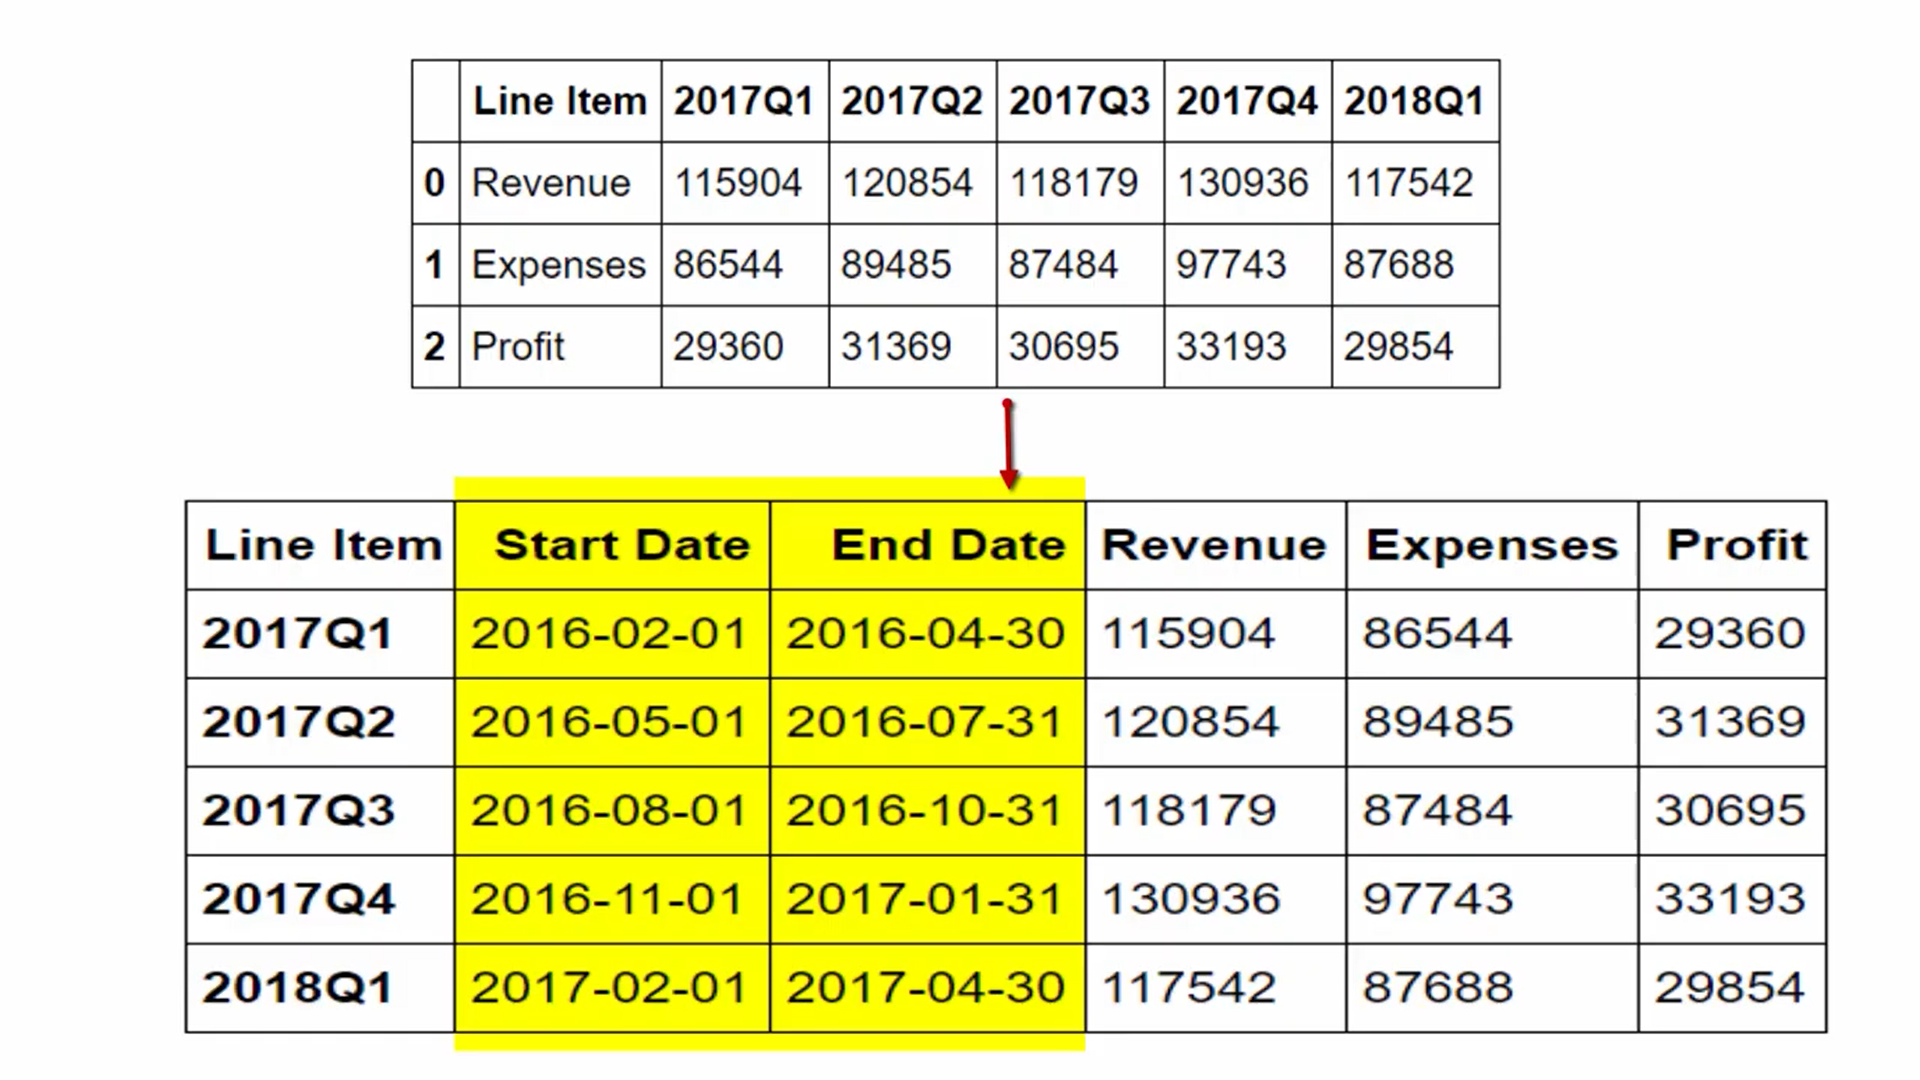

In [31]:
df.set_index("Line Item",inplace=True)
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [33]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [36]:
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]')

In [37]:
df.index[0].start_time

Timestamp('2016-02-01 00:00:00')

Add start date end date columns to dataframe

In [35]:
df['Start time'] = df.index.map(lambda x:x.start_time)
df['End time']= df.index.map(lambda x:x.end_time)
df


Line Item,Revenue,Expenses,Profit,Start time,End time
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999
